# EV Market Segmentation — Muskan
## 1. Import Libraries
## 2. Load Dataset
## 3. Basic EDA
## 4. Data Cleaning & Feature Selection
## 5. Scaling
## 6. Clustering (Elbow + Silhouette + Final KMeans)
## 7. Visualizations
## 8. Cluster Interpretation


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [25]:
df = pd.read_csv('/content/Team A ManiSandeep_Muskan_TejaSree.csv')   # or paste the GitHub raw link
df.head()


,Vehicle_Type,Vehicle_Sales,Petrol/Diesel_Sales,EV_Sales,Age_Group
0,Two-Wheelers (Total),24900000,23690000,1210000,18
1,Two-Wheelers (Total),24900000,23690000,1210000,19
2,Two-Wheelers (Total),24900000,23690000,1210000,20
3,Two-Wheelers (Total),24900000,23690000,1210000,21
4,Two-Wheelers (Total),24900000,23690000,1210000,22


In [26]:
df.columns

Index(['Vehicle_Type', 'Vehicle_Sales', 'Petrol/Diesel_Sales', 'EV_Sales',
       'Age_Group'],
      dtype='object')

In [27]:
df_cluster = df[['Vehicle_Sales', 'Petrol/Diesel_Sales', 'EV_Sales']]

In [28]:
df_cluster.isnull().sum()

,0
Vehicle_Sales,0
Petrol/Diesel_Sales,0
EV_Sales,0


In [29]:
df_cluster = df_cluster.dropna()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

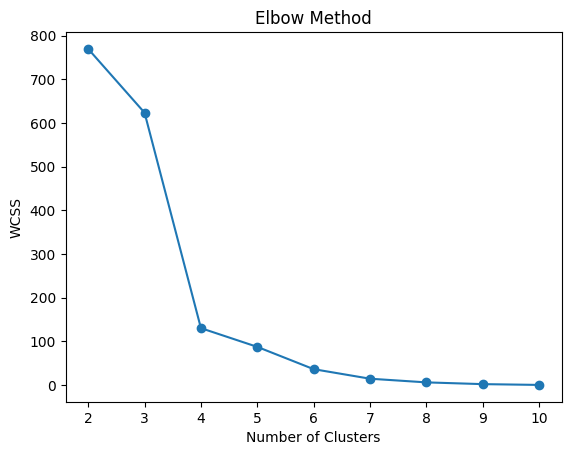

In [31]:
wcss = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    print(k, sil_score)

2 0.7586690517748678
3 0.7557912400197814
4 0.8165309806667324
5 0.829001041647729
6 0.8576842003335998
7 0.8510731963537491
8 0.8830485377552915
9 0.8171159323363786
10 0.8872855290796818


In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X)

In [34]:
df_cluster = df[['Vehicle_Sales', 'Petrol/Diesel_Sales', 'EV_Sales']]
df_cluster.head()

,Vehicle_Sales,Petrol/Diesel_Sales,EV_Sales
0,24900000,23690000,1210000
1,24900000,23690000,1210000
2,24900000,23690000,1210000
3,24900000,23690000,1210000
4,24900000,23690000,1210000


In [35]:
df_cluster.describe()

,Vehicle_Sales,Petrol/Diesel_Sales,EV_Sales
count,8.080000e+02,8.080000e+02,8.080000e+02
mean,4.454270e+06,4.131677e+06,3.225936e+05
std,7.361959e+06,7.129555e+06,4.369875e+05
min,2.500000e+05,0.000000e+00,0.000000e+00
25%,4.500000e+05,2.902770e+05,1.168500e+04
50%,1.050000e+06,9.600000e+05,5.460000e+04
75%,4.200000e+06,4.116000e+06,6.997230e+05
max,2.490000e+07,2.369000e+07,1.210000e+06


In [36]:
df_cluster.nunique()

,0
Vehicle_Sales,17
Petrol/Diesel_Sales,16
EV_Sales,16


In [37]:
df_cluster.head(20)

,Vehicle_Sales,Petrol/Diesel_Sales,EV_Sales
0,24900000,23690000,1210000
1,24900000,23690000,1210000
2,24900000,23690000,1210000
3,24900000,23690000,1210000
4,24900000,23690000,1210000
5,24900000,23690000,1210000
6,24900000,23690000,1210000
7,24900000,23690000,1210000
8,24900000,23690000,1210000
9,24900000,23690000,1210000


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

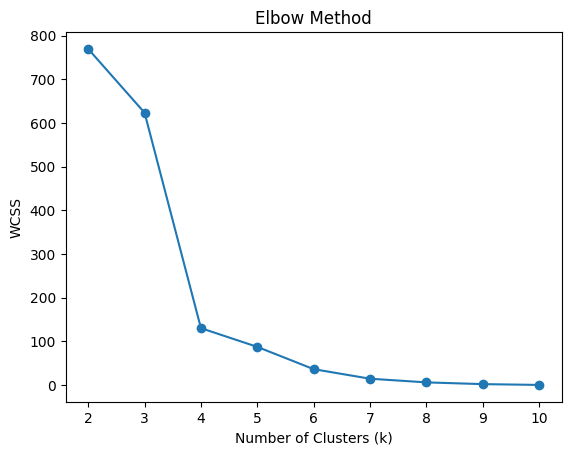

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    print("k =", k, "silhouette =", silhouette_score(X, labels))


k = 2 silhouette = 0.7586690517748678
k = 3 silhouette = 0.7557912400197814
k = 4 silhouette = 0.8165309806667324
k = 5 silhouette = 0.829001041647729
k = 6 silhouette = 0.8576842003335998
k = 7 silhouette = 0.8510731963537491
k = 8 silhouette = 0.8830485377552915
k = 9 silhouette = 0.8171159323363786
k = 10 silhouette = 0.8872855290796818


In [41]:
k = 6
final_kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = final_kmeans.fit_predict(X)
df_cluster.head()

/tmp/ipython-input-3159420672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = final_kmeans.fit_predict(X)


,Vehicle_Sales,Petrol/Diesel_Sales,EV_Sales,cluster
0,24900000,23690000,1210000,2
1,24900000,23690000,1210000,2
2,24900000,23690000,1210000,2
3,24900000,23690000,1210000,2
4,24900000,23690000,1210000,2


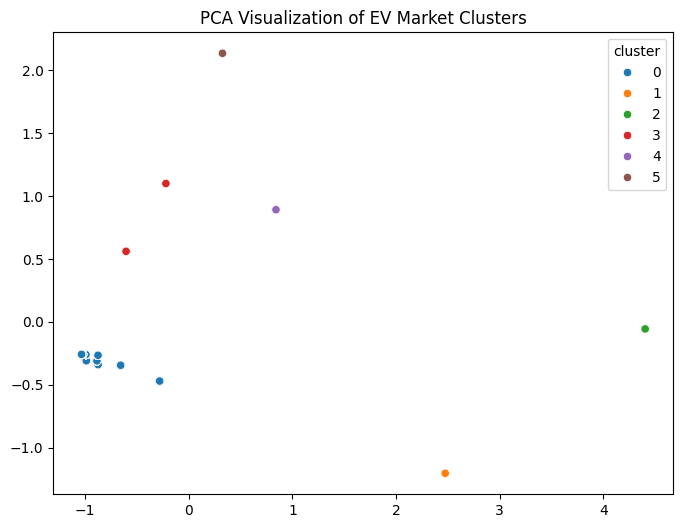

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=df_cluster['cluster'], palette='tab10')
plt.title('PCA Visualization of EV Market Clusters')
plt.show()

In [45]:
df_cluster.groupby('cluster').mean()

,Vehicle_Sales,Petrol/Diesel_Sales,EV_Sales
cluster,,,
0,1.172723e+06,1.147725e+06,2.499779e+04
1,1.854552e+07,1.817441e+07,3.711100e+05
2,2.490000e+07,2.369000e+07,1.210000e+06
3,7.203651e+05,1.545631e+05,5.658021e+05
4,6.354480e+06,5.515590e+06,8.388900e+05
5,1.210000e+06,0.000000e+00,1.210000e+06
